# RUN WITH PYTHON 3.11.5!!!!

In [1]:
import PyPDF2
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora.dictionary import Dictionary

In [2]:
def extract_text_from_pdf(pdf_path) :
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

In [3]:
harry_potter = extract_text_from_pdf('HarryPotterylaPiedraFilosofal.pdf')

In [4]:
match_capitlized_words = '[A-Z]\w+'
capitalized_words = re.findall(match_capitlized_words, harry_potter)

<Axes: title={'center': "First names/last names in Harry Potter and the Philosofer's Stone"}, xlabel='Name'>

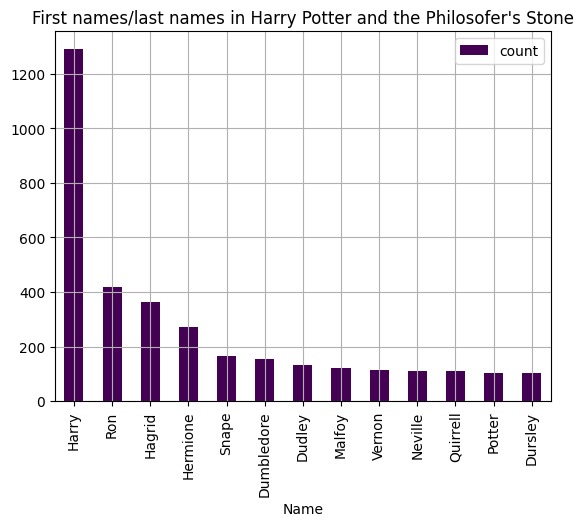

In [5]:
df = pd.DataFrame(capitalized_words)
dfCounts = df.value_counts()
dfCounts = dfCounts.reset_index()
dfCounts = dfCounts.rename(columns={0:'Name'})
dfCounts = dfCounts[-dfCounts['Name'].isin(['No','El','La','Se','Pero','Los','Qué'])]
dfCounts = dfCounts[dfCounts['count']>=100]
dfCounts.plot('Name', 'count', 
            kind = 'bar',
            title = "First names/last names in Harry Potter and the Philosofer's Stone",
            grid = True,
            legend = True,
            colormap = 'viridis',)

<Axes: title={'center': 'Number of characters per chapter'}>

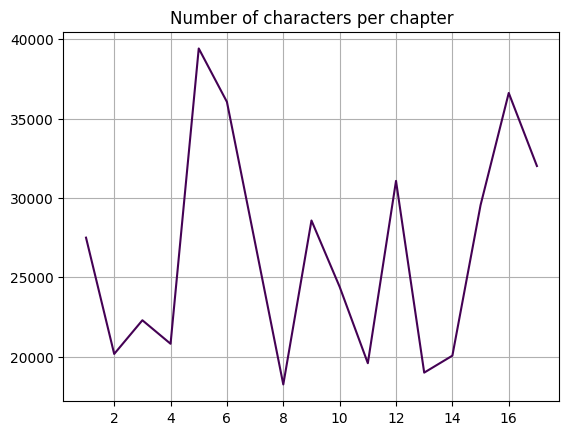

In [6]:
chapters = re.split('CAPÍTULO', harry_potter)[1:]
chapter_metadata = pd.DataFrame()
chapter_metadata['Character Length'] = pd.DataFrame([len(chapter) for chapter in chapters])
chapter_metadata.index+=1
chapter_metadata.plot(
    y = 'Character Length',
    title = 'Number of characters per chapter',
    legend = False,
    colormap = 'viridis',
    grid = True
)

<Axes: title={'center': 'Number of words per chapter'}>

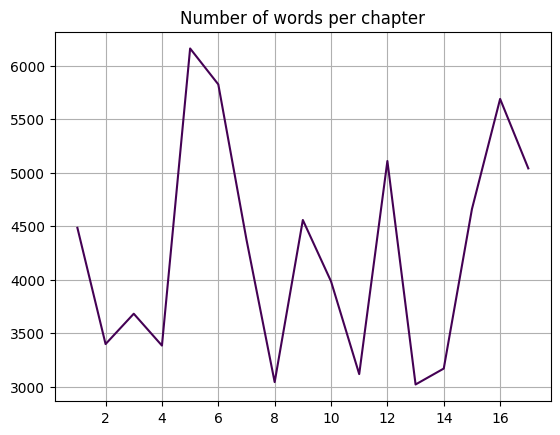

In [7]:
chapter_tokens = [word_tokenize(chapter) for chapter in chapters]
chapter_tokens = [[word for word in token if word.isalpha()] for token in chapter_tokens]
chapter_metadata['Number of Words'] = [len(token) for token in chapter_tokens]
chapter_metadata.plot(
    y = 'Number of Words',
    title = 'Number of words per chapter',
    legend = False,
    colormap = 'viridis',
    grid = True
)

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

<Axes: title={'center': 'Average Number of Characters in a Word per Chapter'}>

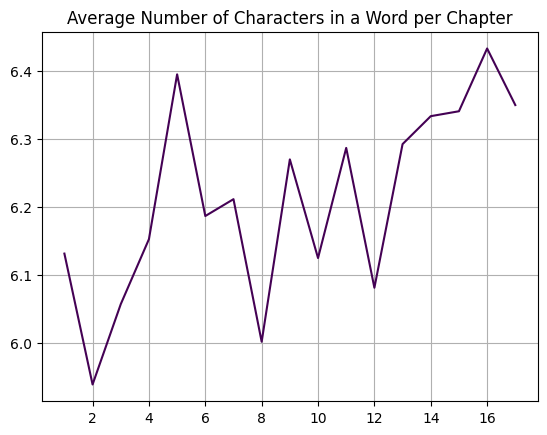

In [8]:
chapter_metadata['Avg Number of Chars per Word'] = [x/y for x,y in zip(chapter_metadata['Character Length'], chapter_metadata['Number of Words'])]
chapter_metadata['Avg Number of Chars per Word'].plot(
    title = 'Average Number of Characters in a Word per Chapter',
    grid = True,
    colormap = 'viridis'
)

In [9]:
chapter_words = [word_tokenize(chapter) for chapter in chapters]
chapter_words = [[word.lower() for word in words if word.isalpha()] for words in chapter_words]
chapter_words = [[word for word in  words if word not in stopwords.words('spanish')] for words in chapter_words]

In [10]:
Counter(chapter_words[7]).most_common(10)

[('harry', 45),
 ('hagrid', 22),
 ('snape', 20),
 ('clase', 18),
 ('ron', 17),
 ('si', 10),
 ('día', 8),
 ('filch', 8),
 ('primera', 8),
 ('mientras', 8)]

In [12]:
print('hello')
dictionary = Dictionary(chapter_words)
corpus = [dictionary.doc2bow(chapter) for chapter in chapter_words]
tfidf = TfidfModel(corpus)
i = 1
for chapter_corpus in corpus :
    tfidf_weights = tfidf[chapter_corpus]
    tfidf_weights.sort(key = lambda x : x[1], reverse = True)
    top_words = tfidf_weights[:15]
    topic_words = [dictionary.get(word[0]) for word in top_words]
    print(f"palabras importantes en el capítulo {i}:{topic_words}")
    i+=1

palabras importantes en el capítulo 1:['gato', 'dursley', 'niño', 'calle', 'taladros', 'mantas', 'moto', 'esquina', 'drive', 'privet', 'profesora', 'señor', 'hermana', 'hijo', 'número']
palabras importantes en el capítulo 2:['piers', 'dudley', 'vidrio', 'vernon', 'tía', 'petunia', 'serpiente', 'menudo', 'alacena', 'cocina', 'tío', 'figg', 'zoológico', 'coche', 'bicicleta']
palabras importantes en el capítulo 3:['vernon', 'tío', 'dudley', 'cartas', 'petunia', 'bastón', 'tía', 'alacena', 'smeltings', 'carta', 'cocina', 'uniforme', 'buzón', 'factura', 'hotel']
palabras importantes en el capítulo 4:['vernon', 'tío', 'irá', 'sofá', 'paraguas', 'lily', 'gigante', 'mago', 'misterio', 'salchichas', 'dudley', 'madre', 'acabó', 'despectiva', 'galopantes']
palabras importantes en el capítulo 5:['ollivander', 'griphook', 'tienda', 'monedas', 'tiendas', 'hagrid', 'duende', 'fénix', 'chorreante', 'centímetros', 'madame', 'malkin', 'caldero', 'galeones', 'mostrador']
palabras importantes en el capítu